# Joe Stanley
### ECE 525
### Homework 1

In [1]:
# Import Libraries to Support Calculations
import numpy as np
import matplotlib.pyplot as plt
import eepower as eep
from eepower import u,m,k,M

## Problem 1
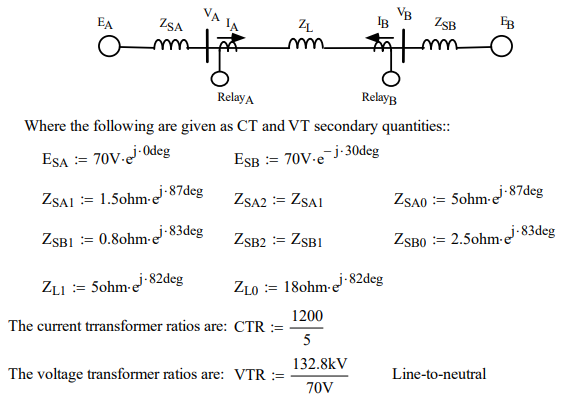

In [2]:
# Define Givens
Esa = eep.phasor(70,0)
Esb = eep.phasor(70,-30)
Zsa1 = eep.phasor(1.5,87)
Zsa2 = Zsa1
Zsa0 = eep.phasor(5,87)
Zsb1 = eep.phasor(0.8,83)
Zsb2 = Zsb1
Zsb0 = eep.phasor(2.5,83)
ZL1 = eep.phasor(5,82)
ZL2 = eep.phasor(18,82)
CTR = 1200/5
VTR = PTR = 132.8*k/70 # Line-Neutral
ZR = PTR/CTR

# A) Convert to primary values
Zsa1_prim = Zsa1 * ZR
Zsa2_prim = Zsa1_prim
Zsa0_prim = Zsa0 * ZR
Zsb1_prim = Zsb1 * ZR
Zsb2_prim = Zsb1_prim
Zsb0_prim = Zsb0 * ZR
ZL1_prim = ZL1 * ZR
ZL2_prim = ZL2 * ZR
eep.cprint(Zsa1_prim,"Ohms","ZSA1-Primary")
eep.cprint(Zsa2_prim,"Ohms","ZSA2-Primary")
eep.cprint(Zsa0_prim,"Ohms","ZSA0-Primary")
eep.cprint(Zsb1_prim,"Ohms","ZSB1-Primary")
eep.cprint(Zsb2_prim,"Ohms","ZSB2-Primary")
eep.cprint(Zsb0_prim,"Ohms","ZSB0-Primary")
eep.cprint(ZL1_prim,"Ohms","ZL1-Primary")
eep.cprint(ZL2_prim,"Ohms","ZL2-Primary")
Esa_prim = Esa * PTR
Esb_prim = Esb * PTR
eep.cprint(Esa_prim/k,"kV","ESA-Primary")
eep.cprint(Esb_prim/k,"kV","ESB-Primary")
# Evaluate Zeq to find Line Current
Zeq1 = Zsa1_prim + Zsb1_prim + ZL1_prim
Zeq2 = Zsa2_prim + Zsb2_prim + ZL2_prim
Zeq0 = Zsa0_prim + Zsb0_prim
# Find Line Current
Iline_prim = (Esa_prim - Esb_prim) / Zeq1
eep.cprint(Iline_prim,"A","Line Current (Primary):")
# Convert Line Current to Secondary, Accounting for Polarity
Iline_sec_R1 = Iline_prim / CTR
Iline_sec_R2 = - Iline_sec_R1
eep.cprint(Iline_sec_R1,"A","Relay-1 Line Current:")
eep.cprint(Iline_sec_R2,"A","Relay-2 Line Current:")

ZSA1-Primary 11.857 ∠ 87.0° Ohms
ZSA2-Primary 11.857 ∠ 87.0° Ohms
ZSA0-Primary 39.524 ∠ 87.0° Ohms
ZSB1-Primary 6.324 ∠ 83.0° Ohms
ZSB2-Primary 6.324 ∠ 83.0° Ohms
ZSB0-Primary 19.762 ∠ 83.0° Ohms
ZL1-Primary 39.524 ∠ 82.0° Ohms
ZL2-Primary 142.286 ∠ 82.0° Ohms
ESA-Primary 132.8 ∠ 0.0° kV
ESB-Primary 132.8 ∠ -30.0° kV
Line Current (Primary): 1191.994 ∠ -8.136° A
Relay-1 Line Current: 4.967 ∠ -8.136° A
Relay-2 Line Current: 4.967 ∠ 171.864° A


In [6]:
# B) Repeat Part A in Per-Unit
# Define Per-Unit Quantities
Sbase = 100*M
VbLN = 132.8*k
VbLL = eep.phaseline(VLN = VbLN)
Zbase = eep.zpu(Sbase,VLN=VbLN)
Ibase = eep.ipu(Sbase,VLL=VbLL)
# Display Results
eep.cprint(Zsa1_prim/Zbase,"PU-Ohms","ZSA1-Primary")
eep.cprint(Zsa2_prim/Zbase,"PU-Ohms","ZSA2-Primary")
eep.cprint(Zsa0_prim/Zbase,"PU-Ohms","ZSA0-Primary")
eep.cprint(Zsb1_prim/Zbase,"PU-Ohms","ZSB1-Primary")
eep.cprint(Zsb2_prim/Zbase,"PU-Ohms","ZSB2-Primary")
eep.cprint(Zsb0_prim/Zbase,"PU-Ohms","ZSB0-Primary")
eep.cprint(ZL1_prim/Zbase,"PU-Ohms","ZL1-Primary")
eep.cprint(ZL2_prim/Zbase,"PU-Ohms","ZL2-Primary")
eep.cprint(Esa_prim/VbLL,"PU-V","ESA-Primary")
eep.cprint(Esb_prim/VbLL,"PU-V","ESB-Primary")

ZSA1-Primary 0.022 ∠ 87.0° PU-Ohms
ZSA2-Primary 0.022 ∠ 87.0° PU-Ohms
ZSA0-Primary 0.075 ∠ 87.0° PU-Ohms
ZSB1-Primary 0.012 ∠ 83.0° PU-Ohms
ZSB2-Primary 0.012 ∠ 83.0° PU-Ohms
ZSB0-Primary 0.037 ∠ 83.0° PU-Ohms
ZL1-Primary 0.075 ∠ 82.0° PU-Ohms
ZL2-Primary 0.269 ∠ 82.0° PU-Ohms
ESA-Primary 0.577 ∠ 0.0° PU-V
ESB-Primary 0.577 ∠ -30.0° PU-V


In [20]:
# C) Evaluate Power Flow
# Define Power Flow from Bus Function
def pflowatbus(VLNsrc,Zsrc,Iline,phs=3,scale=k,round=None):
    # Condition Inputs
    scale = float(scale)
    phs = int(phs)
    # Find Bus Voltage
    Vbus = VLNsrc - Iline * Zsrc
    # Find Power Flow at Bus
    Sbus = (phs) * Vbus * np.conj(Iline) / scale
    # Break into Real/Reactive
    Pbus = Sbus.real
    Qbus = Sbus.imag
    ret = [Pbus,Qbus,abs(Sbus)]
    if round is not None:
        ret = np.around(ret,round)
    return(ret)

Pa, Qa, Sa = pflowatbus(Esa_prim,Zsa1_prim,Iline_prim,scale=M,round=3)
print("Real Power Measured at Bus-A:",Pa,"MW")
print("Reactive Power Meas. at Bus-A:",Qa,"MVAr")

Pb, Qb, Sb = pflowatbus(Esb_prim,Zsb1_prim,-Iline_prim,scale=M,round=3)
print("Real Power Measured at Bus-B:",Pb,"MW")
print("Reactive Power Meas. at Bus-B:",Qb,"MVAr")

Real Power Measured at Bus-A: 467.465 MW
Reactive Power Meas. at Bus-A: 16.739 MVAr
Real Power Measured at Bus-B: -444.018 MW
Reactive Power Meas. at Bus-B: 150.093 MVAr


In [58]:
# D) Find the Effective Impedance
# Define effective element calculator function
def effectivez(VLNsrc,Zsrc,Ilineseq,Zlineseq,PTR,CTR,round=None):
    # Break out Sequence Terms
    I0, I1, I2 = Ilineseq
    Z0, Z1, Z2 = Zlineseq
    # Ensure that Z-components are imaginary
    if(not isinstance(Z0, complex)): Z0 *= 1j
    if(not isinstance(Z1, complex)): Z1 *= 1j
    if(not isinstance(Z2, complex)): Z2 *= 1j
    # Find Bus Voltage
    Vbus = VLNsrc - I1 * Zsrc
    # Evaluate Secondary Bus Voltage
    Vbus2nd = Vbus / PTR
    # Calculate ko
    ko = (Z0-Z1)/Z0
    # Find the Secondary Current
    Irelay = I1 / CTR
    # Calculate Effective Z-AG
    Zag_eff = Vbus2nd / (Irelay + ko*I0)
    ret = [Zag_eff]
    if round is not None:
        ret = np.around(ret,round)
    return(ret)

eep.cprint(effectivez(Esa_prim,Zsa1_prim,[0,Iline_prim,0],
                      [Zsa0_prim,Zsa1_prim,Zsa2_prim],PTR,CTR,3),
           "ohms","Effective Impedance From Relay 1:")
eep.cprint(effectivez(Esb_prim,Zsb1_prim,[0,-Iline_prim,0],
                      [Zsb0_prim,Zsb1_prim,Zsb2_prim],PTR,CTR,3),
           "ohms","Effective Impedance From Relay 2:")

Effective Impedance From Relay 1: 13.883 ∠ 2.052° ohms
Effective Impedance From Relay 2: 13.911 ∠ 161.321° ohms


In [69]:
# E) 3-Phase Fault (Load Flow Ignored!)
# Evaluate the line impedance
Za = Zsa1 + 0.3*ZL1
Zb = Zsb1 + 0.7*ZL1
Zth = eep.parallelz((Za,Zb))
# Calculate Fault Current
Ifault_sec = eep.fault.phs3(Esa,[None,Zth,None],sequence=False)
eep.cprint(Ifault_sec,"A-sec",["IA-Fault","IB-Fault","IC-Fault"])
# Scale Fault Current to Primary
Ifault_pri = Ifault_sec * CTR
eep.cprint(Ifault_pri,"A-pri",["IA-Fault","IB-Fault","IC-Fault"])
print()
# Divide Currents into Different Branches
IA_sec = Ifault_sec[0]
IA_pri = Ifault_pri[0]
IR1_sec = eep.curdiv(Za,(Zb,),Iin=IA_sec)
IR2_sec = eep.curdiv(Zb,(Za,),Iin=IA_sec)
eep.cprint([IR1_sec,IR2_sec],"A-sec",["Relay-1 Current","Relay-2 Current"])
IR1_pri = eep.curdiv(Za,(Zb,),Iin=IA_pri)
IR2_pri = eep.curdiv(Zb,(Za,),Iin=IA_pri)
eep.cprint([IR1_pri,IR2_pri],"A-pri",["Relay-1 Current","Relay-2 Current"])
print()

# Compare with Load Flow
print("Relay 1:")
eep.cprint(Iline_sec_R1,"A-sec","\tLoad Current:")
eep.cprint(IR1_sec,"A-sec","\tFault Current:")
eep.cprint(IR1_sec/Iline_sec_R1,"","\tRatio:")
print("Relay 2:")
eep.cprint(Iline_sec_R2,"A-sec","\tLoad Current:")
eep.cprint(IR2_sec,"A-sec","\tFault Current:")
eep.cprint(IR2_sec/Iline_sec_R2,"","\tRatio:")
print()

# Calculate Effective Impedance
eep.cprint(effectivez(Esa_prim,Zsa1_prim,[0,IR1_pri,0],
                      [Zsa0_prim,Zsa1_prim,Zsa2_prim],PTR,CTR,3),
           "ohms","Effective Impedance From Relay 1:")
eep.cprint(effectivez(Esb_prim,Zsb1_prim,[0,IR2_pri,0],
                      [Zsb0_prim,Zsb1_prim,Zsb2_prim],PTR,CTR,3),
           "ohms","Effective Impedance From Relay 2:")

# Ioperate and Irestraint
Icap_a_sec = (100/2)/CTR * 1j
Icap_b_sec = Icap_a_sec
Ioperate = Icap_a_sec + Icap_b_sec + Iline_sec_R2 + Iline_sec_R1
eep.cprint(Ioperate,"A-sec","I-Operate (Load)")
Irestrain = abs(Icap_a_sec) + abs(Icap_b_sec) + abs(Iline_sec_R2) + abs(Iline_sec_R1)
print("I-Restrain (Load)",Irestrain,"A-sec")
Ioperate = Icap_a_sec + Icap_b_sec + IR2_sec + IR1_sec
eep.cprint(Ioperate,"A-sec","I-Operate (Fault)")
Irestrain = abs(Icap_a_sec) + abs(Icap_b_sec) + abs(IR2_sec) + abs(IR1_sec)
print("I-Restrain (Fault)",Irestrain,"A-sec")

[['IA-Fault 39.627 ∠ -83.55° A-sec']
 ['IB-Fault 39.627 ∠ 156.45° A-sec']
 ['IC-Fault 39.627 ∠ 36.45° A-sec']]
[['IA-Fault 9510.524 ∠ -83.55° A-pri']
 ['IB-Fault 9510.524 ∠ 156.45° A-pri']
 ['IC-Fault 9510.524 ∠ 36.45° A-pri']]

[['Relay-1 Current 23.356 ∠ -84.5° A-sec']
 ['Relay-2 Current 16.279 ∠ -82.186° A-sec']]
[['Relay-1 Current 5605.335 ∠ -84.5° A-pri']
 ['Relay-2 Current 3907.067 ∠ -82.186° A-pri']]

Relay 1:
	Load Current: 4.967 ∠ -8.136° A-sec
	Fault Current: 23.356 ∠ -84.5° A-sec
	Ratio: 4.702 ∠ -76.364° 
Relay 2:
	Load Current: 4.967 ∠ 171.864° A-sec
	Fault Current: 16.279 ∠ -82.186° A-sec
	Ratio: 3.278 ∠ 105.95° 

Effective Impedance From Relay 1: 1.5 ∠ 81.989° ohms
Effective Impedance From Relay 2: 3.636 ∠ 45.713° ohms
I-Operate (Load) 0.417 ∠ 90.0° A-sec
I-Restrain (Load) 10.349952568074297 A-sec
I-Operate (Fault) 39.213 ∠ -83.481° A-sec
I-Restrain (Fault) 40.0516745616 A-sec
